# Deep Learning for real

<img src='img/numbers.png'>

## Input layer and data transformations

The *input layer* is built for you, but you must scale your data appropriately before training with it.

Neural networks are easier to train if the input data has the following properties:
* the values of each feature are *small*, between 0 and 1
* all features should be of the same scale
* *optional*: each feature should have a 0 mean
* *optional*: each feature should have a unit standard deviation

The `sklearn.preprocessing.scale` function or `sklearn.preprocessing.StandardScaler` model can perform these actions.

Image data is typically stored as three or 4-dimensional arrays of integers. Each color or alpha channel will be divided by 255.

Like Scikit-Learn missing values must be processed before training or predicting. This is accomplished by replacing NaN with 0 or some reasonable value.

If your new data is expected to have some missing data the training set should be engineered to also have some samples with missing data so that the model understand how to to properly ignore those features.

## Dense Layers

So far we've seen *dense* layers. These layers form linear combinations over all the inputs. This is where the real work happens.

> Dense layers *learn* the features rather than required that they be *engineered*

Chains of large dense layers have a lot of *hypothesis space* to explore. This means that **overfit** easily. There are several ways to overcome this
* *Use more data*. Neural networks perform better computationally and statistically with extremely large data sets.
* Reduce the size or number of layers.
* Include special actions like *Dropout layers* that randomly reduce the capacity of large layers during training.

## Convolutional Layers

The bread-and-butter of image classification.

Convolutional layers apply *feature extraction* filters, like those in traditional image processing, over the image to generate different representations. Convolutional filters have been developed to
* sharpen
* blur
* outline
* emboss

See this post for some great examples: http://setosa.io/ev/image-kernels/

In Deep Learning the filter values itself are *learned* as weights of that layer. The opens up enourmous power to be able to train image classifiers.

The image below show convolutional layers in the red box followed by dense *classification* layers in blue. These classification layers are the same ones you worked with using ScratchNet.

<img src='img/convolutional_neural_network.png'>

https://developer.nvidia.com/discover/convolutional-neural-network

Let's see a quick example of what really happens in a convolutional layer.

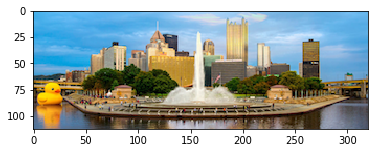

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
pitt = plt.imread('pittsburgh.png')[:,:,:3]
plt.imshow(pitt)

Here's a standard convolutional filter to enahnce edges in an image. We're using SciPy to help us out.

Try changing values in the `kernel` array and running the cell.

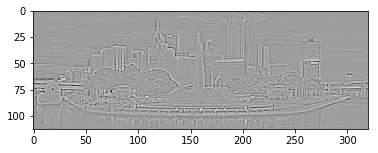

In [5]:
import numpy as np
from scipy.ndimage import convolve

kernel = np.array(
    [[-1, -1,  -1],
     [-1,  8,  -1],
     [-1, -1,  -1]]
)

one_channel = convolve(pitt[:,:,0], kernel)

plt.imshow(one_channel, cmap='gray')

The VGG16 model builds extremely massive convolutional layers then pushes all of those representations through three dense layers to build the classifier to be able to predict 1000 different types of images.

<img src='img/vgg16.png'>

Here's the VGG16 model as implemented in Keras. The MaxPooling2D layers help to *generalize* the new feature over a larger area of the original image.

The model has nearly 140 million parameters.

```python
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax')
```